In [1]:
%pip install numpy pandas fastapi uvicorn pydantic scikit-learn requests matplotlib jinja2 python-multipart seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.metrics import euclidean_distances, r2_score, mean_absolute_error, mean_squared_error, silhouette_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import pickle
import os

pd.options.display.max_columns = 30

In [3]:
df = pd.read_csv('datasets/Housing data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Exploratory Data Analysis

In [4]:
df.shape

(4600, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
df.duplicated().any()

np.False_

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

In [51]:
numerical_cols.shape

(13,)

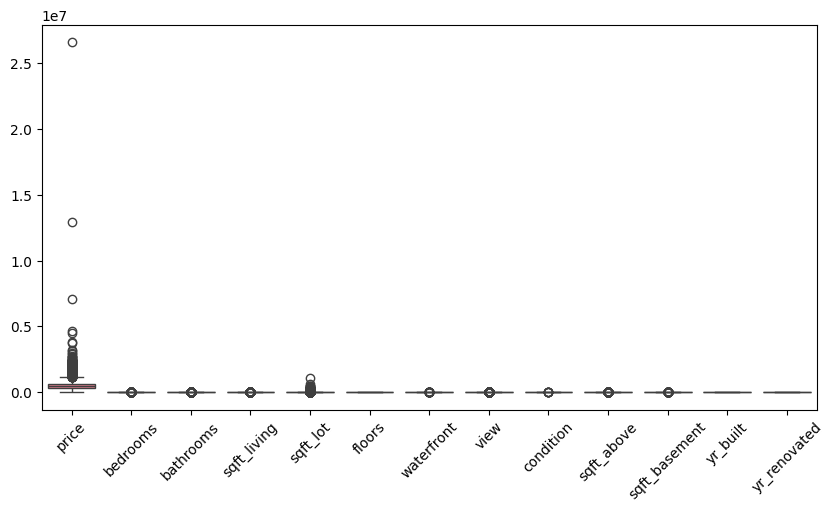

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.show()

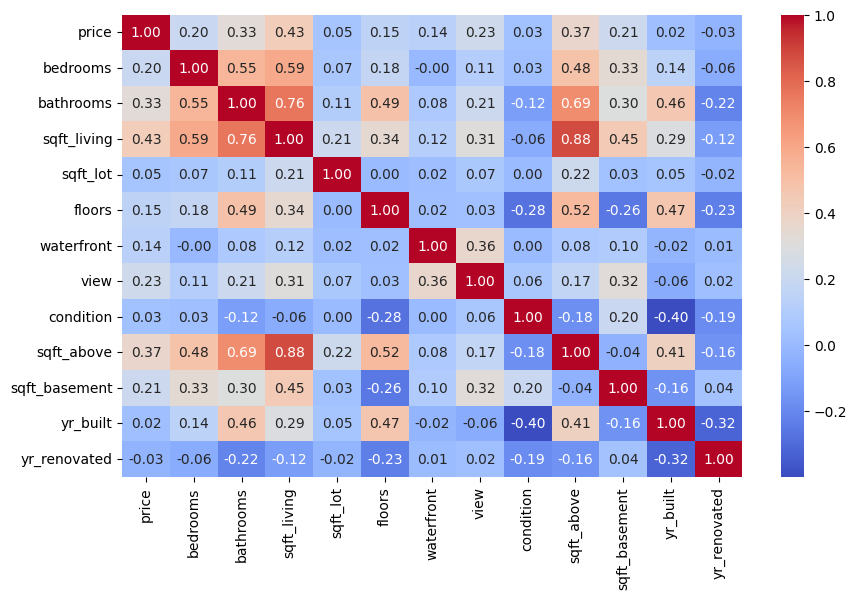

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Feature Engineering

## Getting Map Coordinates
Using Azure Maps API and saving it into a dataframe locally so as to not run it everytime

In [13]:
def get_latitude_and_longitude(address):
    try:
        base_url = "https://atlas.microsoft.com/search/address/json"
        params = {
                "api-version": "1.0",
                "subscription-key": os.getenv('AZURE_MAPS_API_KEY'),
                "query": address
            }
        return requests.get(base_url, params=params).json()['results'][0]['position']
    except:
        return 

In [ ]:
'''temp = df['full_address'].map(get_latitude_and_longitude)
df['lat'] = temp.apply(lambda x: x['lat'] if isinstance(x, dict) else None)
df['lon'] = temp.apply(lambda x: x['lon'] if isinstance(x, dict) else None)

# Manually replacing the values
df.loc[4078, 'lat'] = 47.570575
df.loc[4078, 'lon'] = -122.152869
df.loc[4135, 'lat'] = 47.630199
df.loc[4135, 'lon'] = -122.236300

df[['lat', 'lon']].to_csv('datasets/saved_coordinates.csv', index=None)'''

"temp = df['full_address'].map(get_latitude_and_longitude)\ndf['lat'] = temp.apply(lambda x: x['lat'] if isinstance(x, dict) else None)\ndf['lon'] = temp.apply(lambda x: x['lon'] if isinstance(x, dict) else None)\n\n# Manually replacing the values\ndf.loc[4078, 'lat'] = 47.570575\ndf.loc[4078, 'lon'] = -122.152869\ndf.loc[4135, 'lat'] = 47.630199\ndf.loc[4135, 'lon'] = -122.236300\n\ndf[['lat', 'lon']].to_csv('saved_coordinates.csv', index=None)"

In [14]:
df['full_address'] = df[['street', 'city', 'statezip', 'country']].agg(', '.join, axis=1)
df = pd.concat([df, pd.read_csv('datasets/saved_coordinates.csv')], axis=1).drop(columns=['street', 'city', 'statezip', 'country'])

In [15]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,full_address,lat,lon
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,"18810 Densmore Ave N, Shoreline, WA 98133, USA",47.765800,-122.338867
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,"709 W Blaine St, Seattle, WA 98119, USA",47.634545,-122.366872
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",47.367145,-122.150461
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,"857 170th Pl NE, Bellevue, WA 98008, USA",47.618711,-122.113831
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,"9105 170th Ave NE, Redmond, WA 98052, USA",47.683039,-122.113949


## Outlier Removal

In [16]:
def detect_upper_outliers_iqr(array, k=1.5):
    Q1 = array.quantile(0.25)
    Q3 = array.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + k * IQR
    max_val = array.max()
    return df[array.apply(lambda x: x >= upper_bound)].index
    # no_of_outliers = array.apply(lambda x: x >= upper_bound).value_counts()[True]
    # new_array = array.apply(lambda x: upper_bound if x >= upper_bound else x)
    # return max_val, upper_bound, no_of_outliers, new_array

In [17]:
q1  = detect_upper_outliers_iqr(df['bedrooms'], k=1.5)
q2  = detect_upper_outliers_iqr(df['bathrooms'], k=1.5)
q3 = detect_upper_outliers_iqr(df['sqft_living'], k=1.5)
q4 = detect_upper_outliers_iqr(df['sqft_lot'], k=1.5)
q5 = detect_upper_outliers_iqr(df['sqft_above'], k=1.5)
q6 = detect_upper_outliers_iqr(df['sqft_basement'], k=1.5)
q7 = detect_upper_outliers_iqr(df['price'], k=1.5)

In [18]:
df = df[~df.index.isin(q1.union(q2).union(q3).union(q4).union(q5).union(q6).union(q7))].reset_index(drop=True)

In [19]:
df.shape

(3727, 17)

## Renovation Year

In [ ]:
df['yr_updated'] = df[['yr_built', 'yr_renovated']].max(axis=1)
df['is_renovated'] = df['yr_renovated'] != 0

In [21]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,full_address,lat,lon,yr_updated,is_renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,"18810 Densmore Ave N, Shoreline, WA 98133, USA",47.765800,-122.338867,2005,True
1,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",47.367145,-122.150461,1966,False
2,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,"857 170th Pl NE, Bellevue, WA 98008, USA",47.618711,-122.113831,1963,False
3,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,"9105 170th Ave NE, Redmond, WA 98052, USA",47.683039,-122.113949,1992,True
4,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,"522 NE 88th St, Seattle, WA 98115, USA",47.692390,-122.322042,1994,True


## Clustering Coordinates into Area Categories

In [22]:
lat_lon_minmax = MinMaxScaler()
lat_lon_scaled = lat_lon_minmax.fit_transform(df[['lat', 'lon']].values)

### Finding optimal Cluster Count using Silhoutte score

In [23]:
min_cluster, max_cluster = 5, 15
best_score, optimal_cluster_count = 0, min_cluster
for i in range(min_cluster, max_cluster + 1):
    km = KMeans(n_clusters=i, random_state=42)
    cluster_labels = km.fit_predict(lat_lon_scaled)
    score = silhouette_score(lat_lon_scaled, cluster_labels)
    if score > best_score:
        best_score = score
        optimal_cluster_count = i

In [24]:
best_score, optimal_cluster_count

(np.float64(0.42407235799459925), 10)

Optimal Cluster count = 10

### Fitting using optimal cluster count and One-Hot encoding the resultant area categories

In [25]:
km = KMeans(n_clusters=optimal_cluster_count, random_state=42)
cluster_labels = km.fit_predict(lat_lon_scaled)
df['area_category'] = cluster_labels

In [26]:
onehot = OneHotEncoder()
area_category_encoded = onehot.fit_transform(df[['area_category']])

In [27]:
df = pd.concat([df, pd.DataFrame(area_category_encoded.todense(), columns=[f"area_{area}" for area in onehot.categories_[0]])], axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,full_address,lat,lon,yr_updated,is_renovated,area_category,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,"18810 Densmore Ave N, Shoreline, WA 98133, USA",47.765800,-122.338867,2005,True,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",47.367145,-122.150461,1966,False,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,"857 170th Pl NE, Bellevue, WA 98008, USA",47.618711,-122.113831,1963,False,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,"9105 170th Ave NE, Redmond, WA 98052, USA",47.683039,-122.113949,1992,True,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,"522 NE 88th St, Seattle, WA 98115, USA",47.692390,-122.322042,1994,True,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Model Training

## Selecting Features

In [28]:
X = df.iloc[:, list(range(2, 13)) + [17, 18] + list(range(20, 20 + optimal_cluster_count))]
y = df['price']

## Scaling using MinMax

In [29]:
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X.values)

### Hyper parameter Tuning using Grid Search

In [30]:
param_grid = {
    'n_estimators': [100, 300, 500],          # Controls number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],       # Smaller values prevent overfitting
    'max_depth': [3, 5, 7],                   # Controls tree complexity
    'min_samples_split': [5, 10],             # Min samples needed to split
    'min_samples_leaf': [2, 5],               # Min samples per leaf
    'subsample': [0.8, 1.0],                  # Fraction of samples used per tree
    'max_features': ['sqrt', 'log2']          # Feature selection per split
}

In [31]:
gb = GradientBoostingRegressor()

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose=1)

In [32]:
grid_search.fit(X_scaled, y)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

### Best params

In [34]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 500,
 'subsample': 0.8}

## Training using Optimal Parameters

### Data splitting

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.85, random_state=42)

In [37]:
model = GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features='log2', min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.8, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Testing

In [38]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [39]:
print(f"R2 Score: {round(r2 * 100, 2)}%")
print(f"Mean Absolute Error: {mae}, which is {round((mae / df['price'].std() )* 100, 2)}% of standard deviation")
print(f"Mean Absolute Error: {round(mse)}")

R2 Score: 75.88%
Mean Absolute Error: 72648.70369328489, which is 35.08% of standard deviation
Mean Absolute Error: 10919533397


### Plotting results

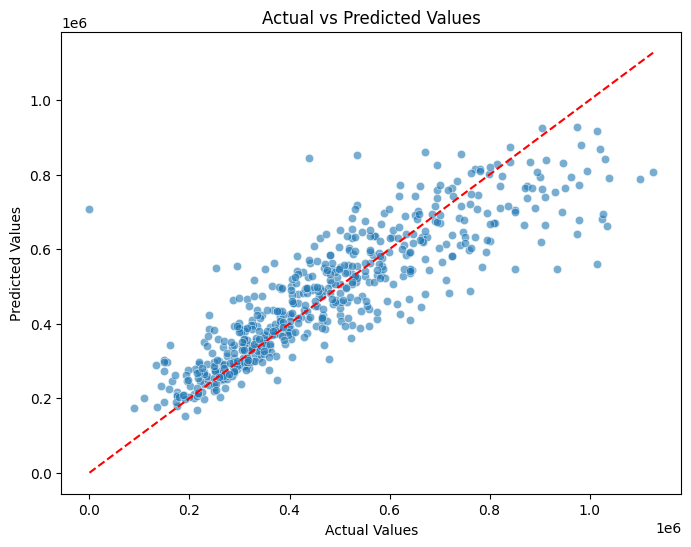

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

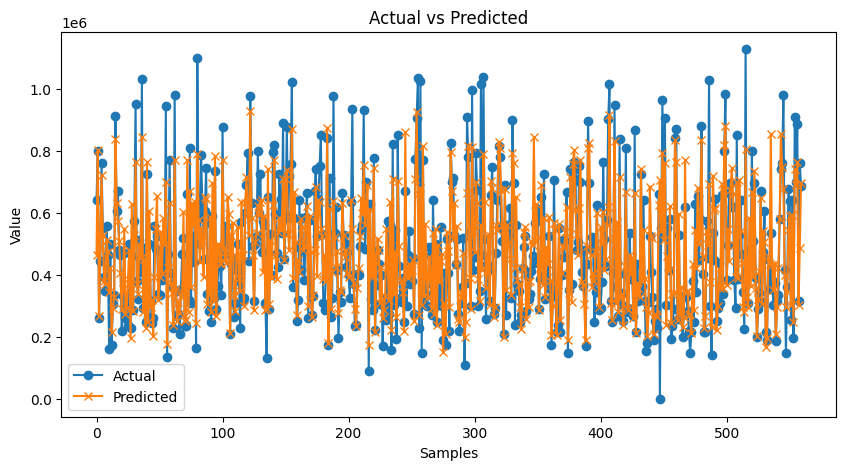

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.xlabel("Samples")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

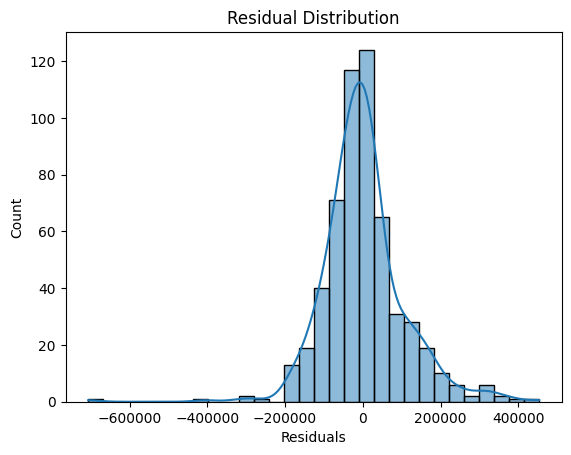

In [42]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

## Training on complete data

In [43]:
final_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='log2', min_samples_leaf=5, min_samples_split=5, n_estimators=300, subsample=0.8, random_state=42)
final_model.fit(X_scaled, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='log2',
                          min_samples_leaf=5, min_samples_split=5,
                          n_estimators=300, random_state=42, subsample=0.8)

## Model Exporting

In [44]:
with open("models/model.pkl", "wb") as file:
    pickle.dump(final_model, file)

with open("models/coordinate_scaler.pkl", "wb") as file:
    pickle.dump(lat_lon_minmax, file)

with open("models/inference_scaler.pkl", "wb") as file:
    pickle.dump(minmax, file)

df_clusters = pd.concat([pd.DataFrame(lat_lon_scaled, columns=['lat_scaled', 'lon_scaled']), df[['area_category']]], axis=1)
df_clusters.to_csv("datasets/coordinate clusters.csv", index=False)
df_clusters.to_pickle("models/coordinates.pkl")

# Inference

In [46]:
with open("models/model.pkl", "rb") as file:
    saved_model = pickle.load(file)

with open("models/coordinate_scaler.pkl", "rb") as file:
    saved_coordinate_scaler = pickle.load(file)

with open("models/inference_scaler.pkl", "rb") as file:
    saved_model_scaler = pickle.load(file)

df_clusters = pd.read_pickle("models/coordinates.pkl")
no_of_areas = df_clusters['area_category'].nunique()

In [47]:
def get_area_category(address):
    coordinates = [list(get_latitude_and_longitude(address).values())]
    scaled_coordinates = lat_lon_minmax.transform(coordinates)
    closest_index = euclidean_distances(df_clusters[['lat_scaled', 'lon_scaled']], scaled_coordinates).argmin()
    area_category = int(df_clusters.loc[closest_index, 'area_category'])
    return area_category

def predict_price(bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, is_renovated, address):
    arr1 = np.array([bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, is_renovated])
    arr2 = np.zeros(shape=no_of_areas)
    area_category = get_area_category(address)
    arr2[area_category] = 1
    X_inference = np.expand_dims(np.hstack([arr1, arr2]), axis=0)
    X_inference_scaled = saved_model_scaler.transform(X_inference)
    predicted_price = float(final_model.predict(X_inference_scaled)[0].round(2))
    return predicted_price

In [48]:
# Inputs

bedrooms = 3
bathrooms = 1.5
sqft_living = 1340
sqft_lot = 7912
sqft_above = 1340
sqft_basement = 0
floors = 1.5
waterfront = False
view = 0
condition = 3
yr_built = 1955
yr_renovated = 2005
is_renovated = True if yr_renovated else False
test_address = "19240 Aurora Ave N Ste A, Shoreline, WA 98133"

In [49]:
predict_price(bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, is_renovated, test_address)

332286.8